## Data Preparation

In [73]:
import pandas as pd

def load_data(file_path):
    """
    Loads the Spotify dataset from the given file path.
    """
    try:
        df = pd.read_csv(file_path)
        print(f"Data loaded successfully. Number of rows: {len(df)}")
        return df
    except FileNotFoundError:
        print(f"File {file_path} not found.")
        return None

def clean_data(df):
    """
    Cleans the Spotify dataset by handling missing values and
    selecting relevant features.
    """
    # Drop any rows with missing values
    df_cleaned = df.dropna()

    # Select relevant features for genre prediction
    relevant_columns = [
        'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 
        'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 
        'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
        'valence', 'tempo', 'time_signature', 'track_genre'
    ]

    df_cleaned = df_cleaned[relevant_columns]

    print(f"Data cleaned. Number of rows after cleaning: {len(df_cleaned)}")
    return df_cleaned


## Exploratory Data Analysis

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_cleaned_data(file_path):
    """
    Loads the cleaned Spotify dataset from the given file path.
    """
    return pd.read_csv(file_path)

def basic_statistics(df):
    """
    Prints basic statistics of the dataset.
    """
    print(df.describe())
    print(df.info())

def plot_genre_distribution(df):
    """
    Plots the distribution of genres in the dataset.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(y='track_genre', data=df, order=df['track_genre'].value_counts().index)
    plt.title("Genre Distribution")
    plt.xlabel("Count")
    plt.ylabel("Genres")
    plt.show()

def plot_audio_features(df):
    """
    Plots the distribution of selected audio features.
    """
    audio_features = ['danceability', 'energy', 'speechiness', 'acousticness', 
                      'instrumentalness', 'liveness', 'valence']
    
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(audio_features, 1):
        plt.subplot(3, 3, i)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()


## loading and cleaning data to running EDA.

Data loaded successfully. Number of rows: 114000
Unnamed: 0                               0
track_id            5SuOikwiRyPMVoIQDJUgSV
artists                        Gen Hoshino
album_name                          Comedy
track_name                          Comedy
popularity                              73
duration_ms                         230666
explicit                             False
danceability                         0.676
energy                               0.461
key                                      1
loudness                            -6.746
mode                                     0
speechiness                          0.143
acousticness                        0.0322
instrumentalness                  0.000001
liveness                             0.358
valence                              0.715
tempo                               87.917
time_signature                           4
track_genre                       acoustic
Name: 0, dtype: object
Data cleaned. Number of r

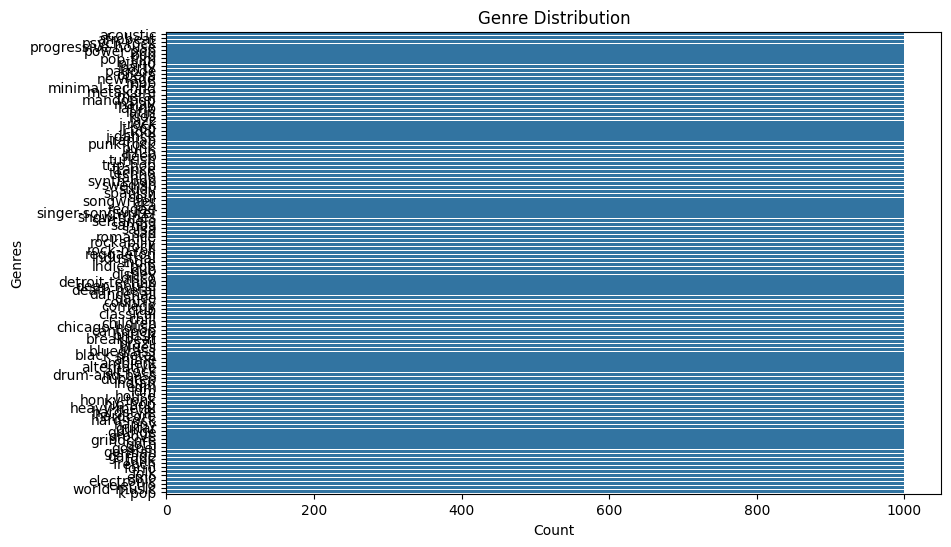

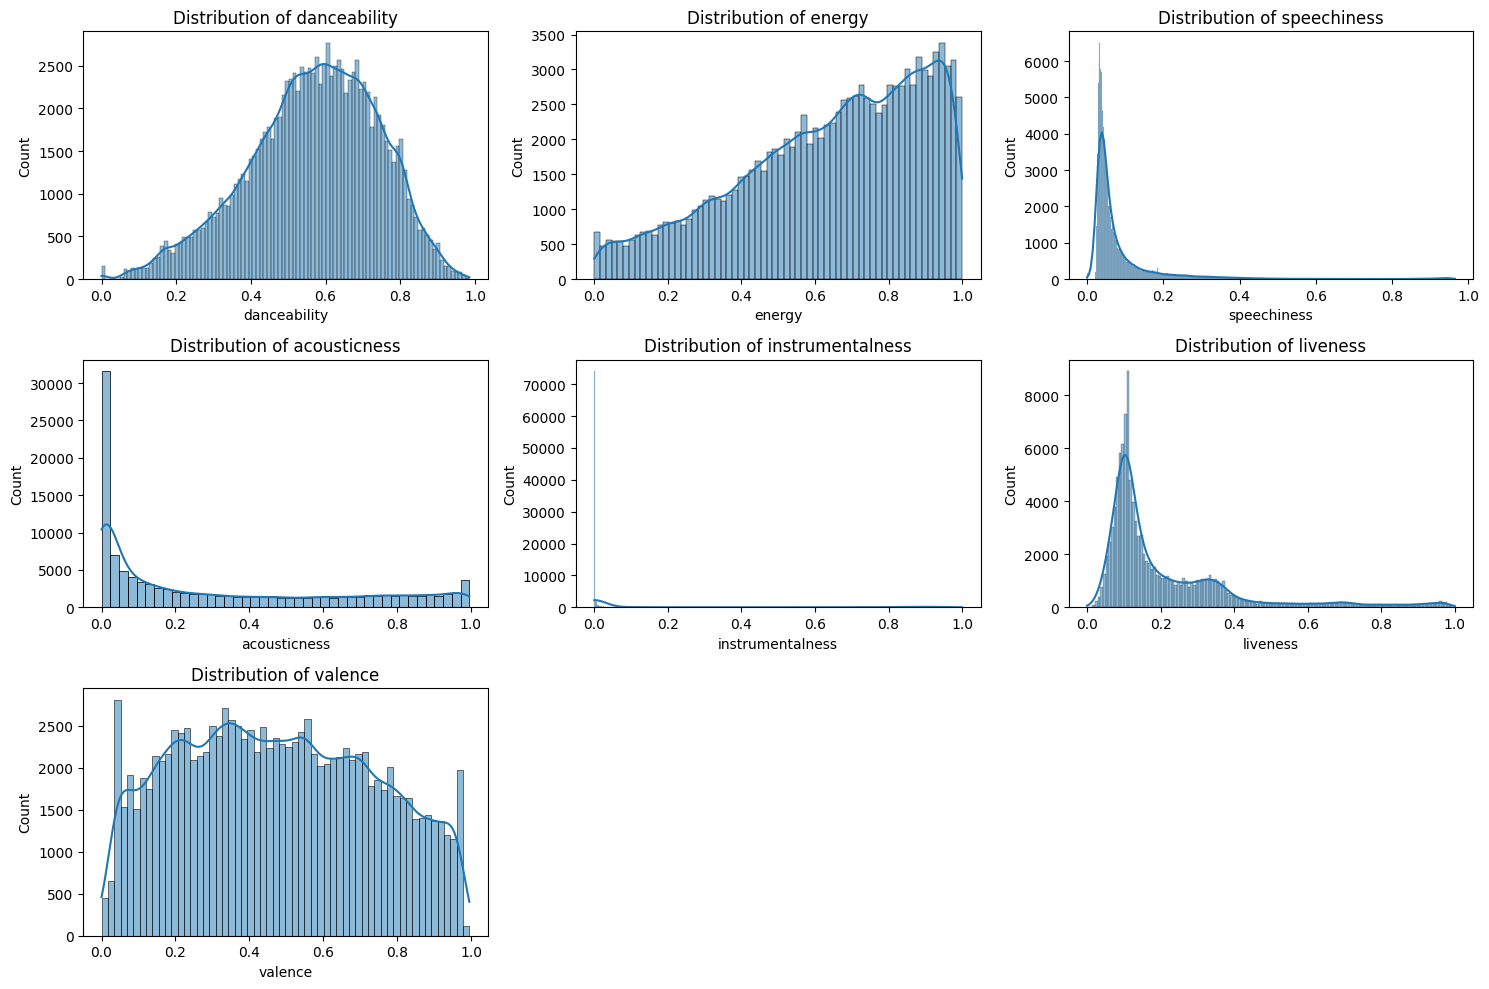

In [75]:
# Step 1: Data Loading
file_path = "../datasets/spotify_tracks_genre.csv"
df = load_data(file_path)
print(df.iloc[0])

# # Step 2: Data Cleaning
df_cleaned = clean_data(df)

# Save the cleaned data
df_cleaned.to_csv("../datasets/spotify_cleaned.csv", index=False)

# Step 3: Exploratory Data Analysis
basic_statistics(df_cleaned)
plot_genre_distribution(df_cleaned)
plot_audio_features(df_cleaned)


# Mode Implementation


In [84]:
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity


# Step 1: Data Preparation and Cleaning
# Select relevant musical features
features = [
    'danceability', 'energy', 'key', 'loudness', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

# Drop rows with missing values
df_cleaned = df_cleaned.dropna(subset=features)

# Step 2: Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(df_cleaned[features])  # Normalize the features for cosine similarity

# Step 3: Train-Test Split
# We are going to "simulate" user data by splitting the data
train_data, test_data = train_test_split(df_cleaned, test_size=0.0001, random_state=42)
# Use the training data to build the recommendation system
X_train = scaler.fit_transform(train_data[features])
X_test = scaler.transform(test_data[features])

# Save the scaler
model_path = os.path.join(os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'models')), 'model.pkl')
joblib.dump(scaler, model_path)

# Step 4: User-Uploaded Data (Simulated as test data for this example)
# Assume the user has uploaded a CSV file with their listened songs
user_uploaded_data = test_data  # Simulating the user-uploaded songs
print(f"user data size: {len(user_uploaded_data)}\nUser Uploaded data")
print(f"{user_uploaded_data[['track_name', 'artists']].to_string(index=False)}\n")
user_X = scaler.transform(user_uploaded_data[features])

# Step 5: Content-Based Filtering Recommendation
# Compute similarity between the user's songs and all other songs in the dataset
similarity_matrix = cosine_similarity(user_X, X_train)

# Step 6: Recommend songs
def recommend_songs(similarity_matrix, train_data, num_recommendations=5):
    recommendations = []
    for i in range(len(user_uploaded_data)):
        # Get similarity scores for the i-th user's uploaded song
        sim_scores = list(enumerate(similarity_matrix[i]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        
        # Get the top num_recommendations recommendations (ignoring the song itself)
        recommended_songs_indices = [sim_scores[j][0] for j in range(1, num_recommendations+1)]
        recommended_songs = train_data.iloc[recommended_songs_indices]
        
        recommendations.append(recommended_songs[['track_name', 'artists']])
    
    return recommendations

# Get recommendations
recommendations = recommend_songs(similarity_matrix, train_data)

# Show recommendations for the first user's uploaded song
print("Recommendations for first uploaded song:")
print(recommendations[0])


user data size: 12
User Uploaded data
                                                          track_name                      artists
                                                       No Other Name             Hillsong Worship
                                                      Failed Organum                 Internal Rot
                                               Save the Trees, Pt. 1   Zhoobin Askarieh;Ali Sasha
                                              It's Only Make Believe                   Billy Fury
                                                               月の大きさ                   Nogizaka46
                                              Jah Jah Revolta, Pt. 2                 BaianaSystem
                                           Please Stop Communicating                   Joe DeRosa
                                                   A Form of Protest                    Cane Hill
                                              I'm Ready - Radio Edit            